In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, mean_absolute_error, mean_squared_error, roc_curve

import shap
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display, HTML

def print_color(text, color="blue"):
    display(HTML(f"<div style='color: {color}; font-weight: bold; font-size: 16px'>{text}</div>"))

In [3]:
df = pd.read_csv("Airline_Delay_Cause.csv")
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [4]:
print(df.columns.tolist())

['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']


In [5]:
#  Loading dataset
df = pd.read_csv("Airline_Delay_Cause.csv")

#  Filtering extreme outliers 
df = df[df['arr_delay'] <= 1000]

#  Creating Is_Delayed column 
df['Is_Delayed'] = (df['arr_delay'] > 15).astype(int)

#  Droping rows with NA values
df.dropna(subset=['arr_delay', 'Is_Delayed'], inplace=True)

print("Remaining rows:", df.shape[0])
print(df[['arr_delay', 'Is_Delayed']].head())

Remaining rows: 94347
   arr_delay  Is_Delayed
0      672.0           1
1      348.0           1
2      859.0           1
3       75.0           1
5      325.0           1


In [6]:
# Droping rows with missing delay values
df.dropna(subset=['arr_delay', 'Is_Delayed'], inplace=True)
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Is_Delayed
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.0,...,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0,1
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.0,...,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0,1
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.0,...,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0,1
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.0,...,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0,1
5,2023,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,7.0,3.00,1.0,...,1.79,0.0,2.0,325.0,168.0,28.0,46.0,0.0,83.0,1


In [7]:
print("Shape of Dataset:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Shape of Dataset: (94347, 22)

Missing Values:
 year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights              0
arr_del15              250
carrier_ct               0
weather_ct               0
nas_ct                   0
security_ct              0
late_aircraft_ct         0
arr_cancelled            0
arr_diverted             0
arr_delay                0
carrier_delay            0
weather_delay            0
nas_delay                0
security_delay           0
late_aircraft_delay      0
Is_Delayed               0
dtype: int64

Summary Statistics:
                year         month   arr_flights     arr_del15    carrier_ct  \
count  94347.000000  94347.000000  94347.000000  94097.000000  94347.000000   
mean    2019.651796      6.514314     58.079981      7.110227      2.802941   
std        2.282747      3.503234     58.732625      5.681826      2.806673   
min    

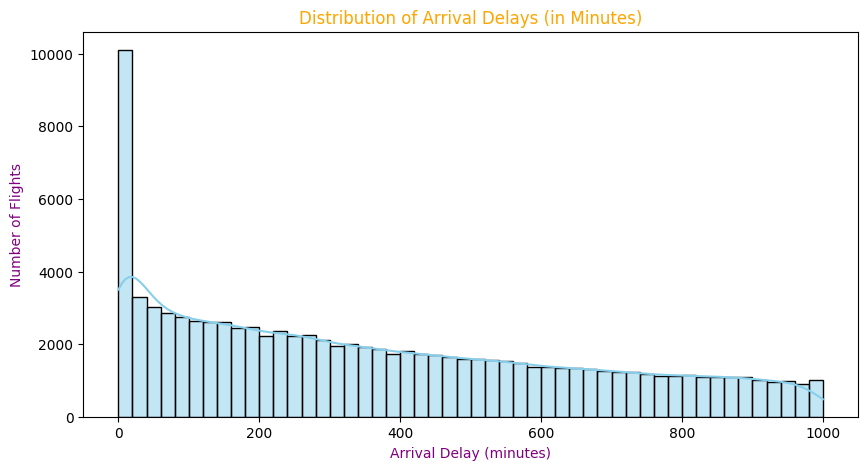

In [8]:
# Arrival delays
plt.figure(figsize=(10, 5))
sns.histplot(df['arr_delay'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Arrival Delays (in Minutes)",color="orange")
plt.xlabel("Arrival Delay (minutes)",color="purple")
plt.ylabel("Number of Flights",color="purple")
plt.show()

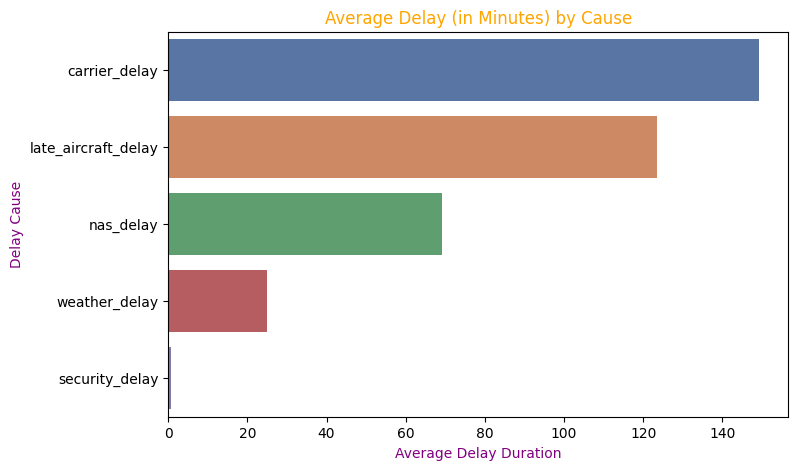

In [9]:
# Common delay causes
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

avg_delay_by_cause = df[delay_causes].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_delay_by_cause.values, y=avg_delay_by_cause.index, palette='deep')
plt.title("Average Delay (in Minutes) by Cause",color="orange")
plt.xlabel("Average Delay Duration",color="purple")
plt.ylabel("Delay Cause",color="purple")
plt.show()

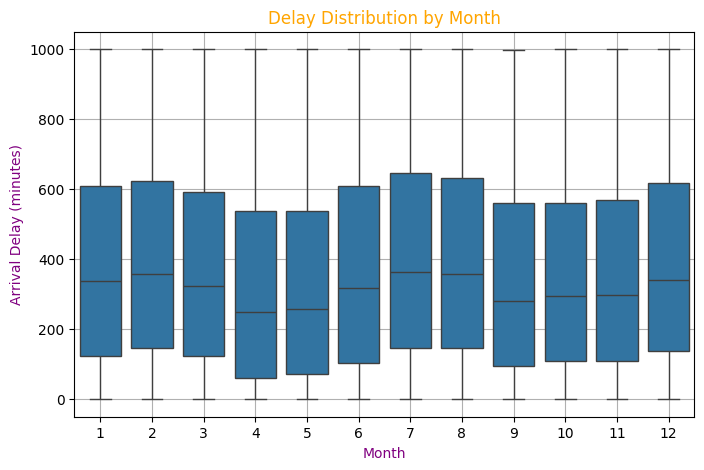

In [10]:
#Temporal patterns
plt.figure(figsize=(8, 5))
sns.boxplot(x='month', y='arr_delay', data=df)
plt.title("Delay Distribution by Month",color="orange")
plt.xlabel("Month",color="purple")
plt.ylabel("Arrival Delay (minutes)",color="purple")
plt.grid(True)
plt.show()

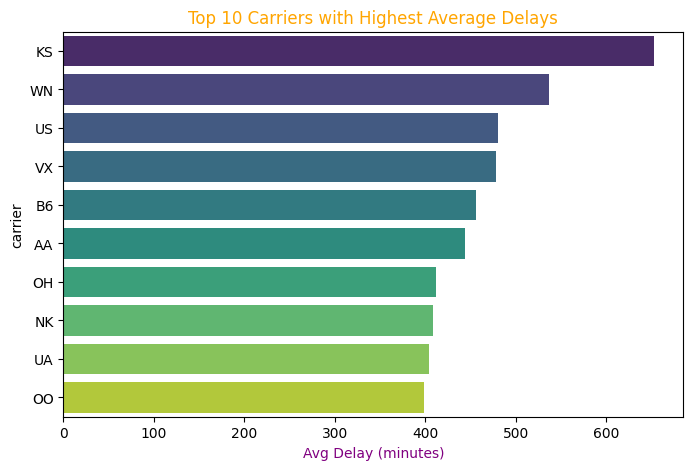

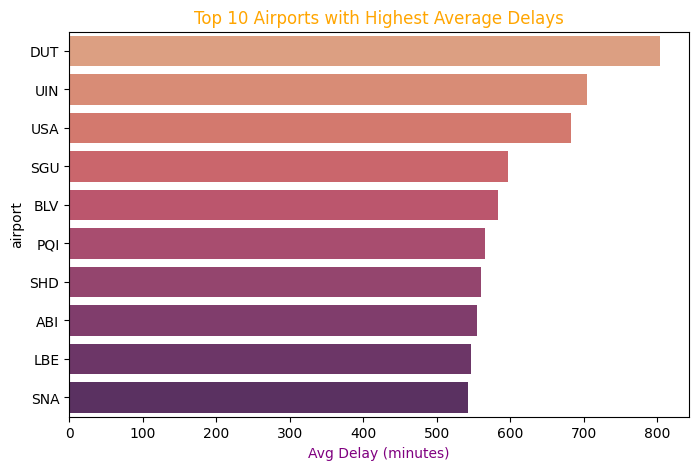

In [11]:
# Top 10 carriers by mean delay
top_carriers = df.groupby('carrier')['arr_delay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_carriers.values, y=top_carriers.index, palette='viridis')
plt.title("Top 10 Carriers with Highest Average Delays",color="orange")
plt.xlabel("Avg Delay (minutes)",color="purple")
plt.show()

# Top 10 airports by delay
top_airports = df.groupby('airport')['arr_delay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_airports.values, y=top_airports.index, palette='flare')
plt.title("Top 10 Airports with Highest Average Delays",color="orange")
plt.xlabel("Avg Delay (minutes)",color="purple")
plt.show()

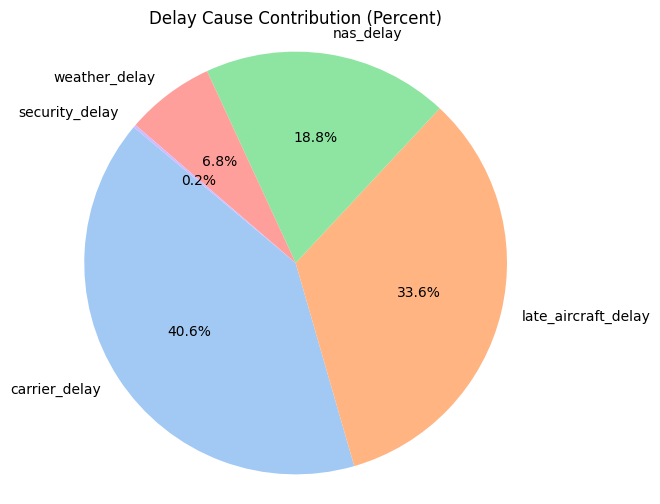

In [14]:
delay_cause_cols = [ 'carrier_delay', 'weather_delay', 'nas_delay','security_delay', 'late_aircraft_delay']
cause_sums = df[delay_cause_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 6))
plt.pie(cause_sums, labels=cause_sums.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Delay Cause Contribution (Percent)')
plt.axis('equal')
plt.show()

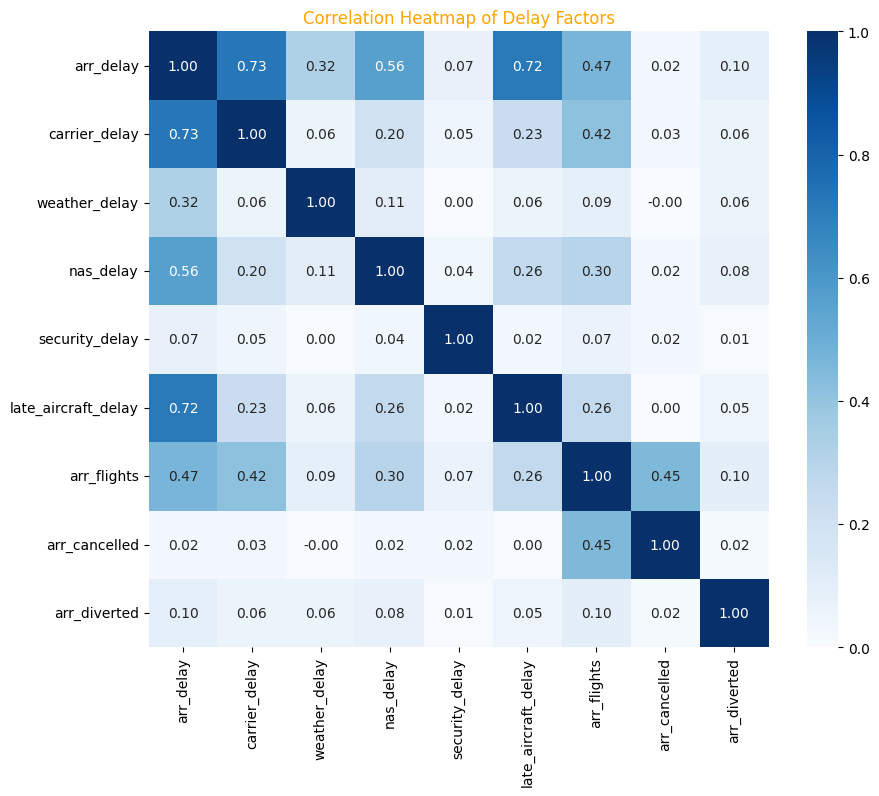

In [22]:
plt.figure(figsize=(10, 8))
corr = df[['arr_delay'] + delay_causes + ['arr_flights', 'arr_cancelled', 'arr_diverted']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap of Delay Factors",color="orange")
plt.show()

In [20]:
#Feature Engineering
# Make a copy of your original dataframe
df_model = df.copy()

# Classification target (binary: 1 if delay > 15 mins)
df_model['Is_Delayed'] = (df_model['arr_delay'] > 15).astype(int)

# Define regression target BEFORE dropping arr_delay
y_reg = df_model['arr_delay']

# Drop columns that cause leakage
leakage_cols = [
    'arr_delay', 'arr_del15', 'carrier_delay', 'weather_delay', 
    'nas_delay', 'security_delay', 'late_aircraft_delay',
    'arr_cancelled', 'arr_diverted'
]
df_model.drop(columns=leakage_cols, inplace=True, errors='ignore')

# Feature Engineering
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Fall'

df_model['season'] = df_model['month'].apply(get_season)

high_traffic_threshold = df_model['arr_flights'].quantile(0.9)
df_model['high_traffic_airport'] = (df_model['arr_flights'] >= high_traffic_threshold).astype(int)

df_model['delay_ratio'] = (
    df_model['carrier_ct'] + df_model['weather_ct'] +
    df_model['nas_ct'] + df_model['security_ct'] + df_model['late_aircraft_ct']
) / df_model['arr_flights']
df_model['delay_ratio'] = df_model['delay_ratio'].fillna(0).clip(0, 1)

# Drop unnecessary columns
df_model.drop(columns=['year', 'carrier_name', 'airport_name'], inplace=True, errors='ignore')

# One-hot encoding
df_model = pd.get_dummies(df_model, columns=['carrier', 'airport', 'season'], drop_first=True)

# Final features and classification target
X = df_model.drop(columns=['Is_Delayed'])
y_cls = df_model['Is_Delayed']

# ✅ Train-test split for both classification and regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_cls_train, y_cls_test, y_reg_train, y_reg_test = train_test_split(
    X, y_cls, y_reg, test_size=0.3, random_state=42, stratify=y_cls
)

# ✅ Confirm shapes
print("X_train shape:", X_train.shape)
print("y_cls_train shape:", y_cls_train.shape)
print("y_reg_train shape:", y_reg_train.shape)


X_train shape: (66042, 429)
y_cls_train shape: (66042,)
y_reg_train shape: (66042,)


In [23]:
#Train-Test data split
X_train, X_test, y_cls_train, y_cls_test, y_reg_train, y_reg_test = train_test_split(X, y_cls, y_reg, test_size=0.3, random_state=42, stratify=y_cls)

# Confirm shapes
print_color("Feature Matrix Shapes:", "blue")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")

print_color("Classification Label Shapes:", "purple")
print(f"y_cls_train shape: {y_cls_train.shape}")
print(f"y_cls_test shape:  {y_cls_test.shape}")

print_color("Regression Target Shapes:", "teal")
print(f"y_reg_train shape: {y_reg_train.shape}")
print(f"y_reg_test shape:  {y_reg_test.shape}")

X_train shape: (66042, 429)
X_test shape:  (28305, 429)


y_cls_train shape: (66042,)
y_cls_test shape:  (28305,)


y_reg_train shape: (66042,)
y_reg_test shape:  (28305,)


              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2688
           1       1.00      1.00      1.00     25617

    accuracy                           1.00     28305
   macro avg       1.00      0.98      0.99     28305
weighted avg       1.00      1.00      1.00     28305



0.9982439204016306


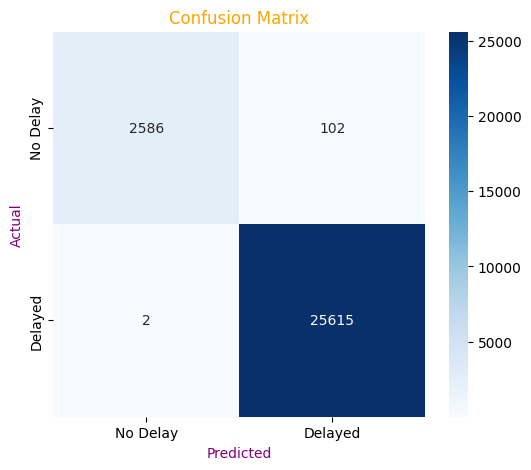

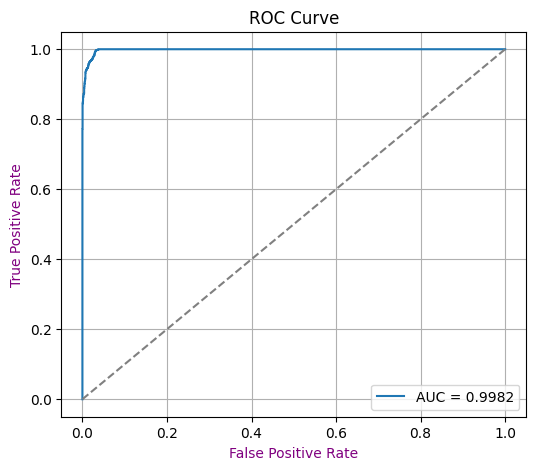

In [27]:
# CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the classifier
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)
clf.fit(X_train, y_cls_train)

# Predict
y_cls_pred = clf.predict(X_test)
y_cls_prob = clf.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print_color("Classification Report:\n",color='Blue')
print(classification_report(y_cls_test, y_cls_pred))
print_color("ROC AUC Score:",color='Blue')
print(roc_auc_score(y_cls_test, y_cls_prob))

# Confusion Matrix
cm = confusion_matrix(y_cls_test, y_cls_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delayed'], yticklabels=['No Delay', 'Delayed'])
plt.title('Confusion Matrix',color='orange')
plt.xlabel('Predicted',color='purple')
plt.ylabel('Actual',color='purple')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_cls_test, y_cls_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_cls_test, y_cls_prob):.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate",color='purple')
plt.ylabel("True Positive Rate",color='purple')
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2688
           1       1.00      0.99      0.99     25617

    accuracy                           0.99     28305
   macro avg       0.96      0.98      0.97     28305
weighted avg       0.99      0.99      0.99     28305

ROC AUC: 0.9986277800781475


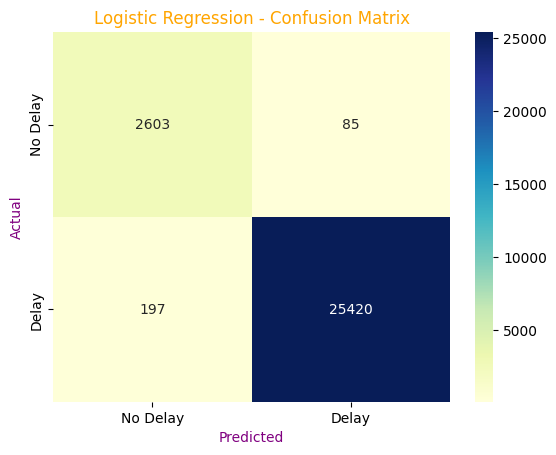

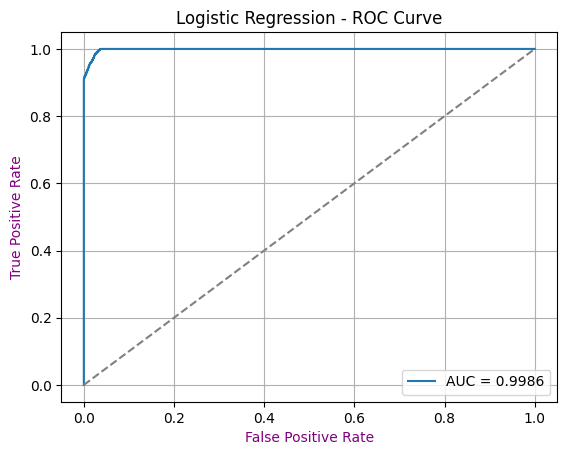

In [34]:
# Logistic Regression – Baseline Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Train logistic regression
lr_model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_cls_train)

# Predict
y_lr_pred = lr_model.predict(X_test)
y_lr_prob = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
print_color("Logistic Regression Report:\n",color='Blue')
print(classification_report(y_cls_test, y_lr_pred))
print("ROC AUC:",roc_auc_score(y_cls_test, y_lr_prob))

# Confusion matrix
cm_lr = confusion_matrix(y_cls_test, y_lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.title("Logistic Regression - Confusion Matrix",color='orange')
plt.xlabel("Predicted",color='purple')
plt.ylabel("Actual",color='purple')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_cls_test, y_lr_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_cls_test, y_lr_prob):.4f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate",color='purple')
plt.ylabel("True Positive Rate",color='purple')
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.grid()
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2688
           1       1.00      1.00      1.00     25617

    accuracy                           1.00     28305
   macro avg       1.00      0.98      0.99     28305
weighted avg       1.00      1.00      1.00     28305

ROC AUC: 0.998794266433005


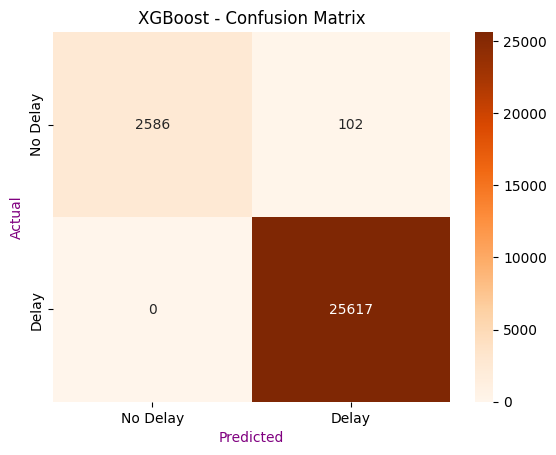

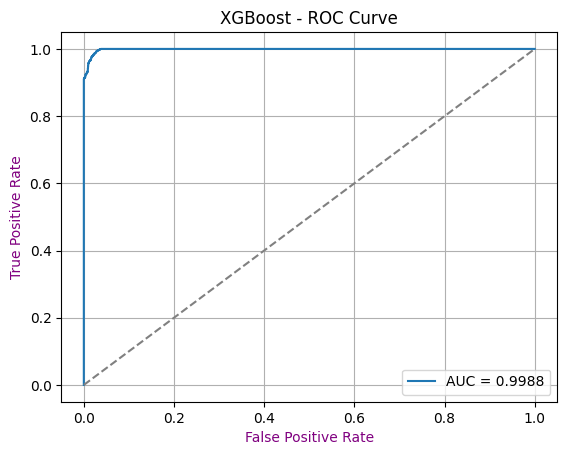

In [37]:
#  XGBoost Classifier – Advanced Model
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=6,scale_pos_weight=1,use_label_encoder=False,
                          eval_metric='logloss',random_state=42)

xgb_model.fit(X_train, y_cls_train)

# Predict
y_xgb_pred = xgb_model.predict(X_test)
y_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print_color("XGBoost Report:\n",color='Blue')
print(classification_report(y_cls_test, y_xgb_pred))
print("ROC AUC:", roc_auc_score(y_cls_test, y_xgb_prob))

# Confusion matrix
cm_xgb = confusion_matrix(y_cls_test, y_xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted",color='purple')
plt.ylabel("Actual",color='purple')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_cls_test, y_xgb_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_cls_test, y_xgb_prob):.4f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate",color='purple')
plt.ylabel("True Positive Rate",color='purple')
plt.title("XGBoost - ROC Curve")
plt.legend()
plt.grid()
plt.show()


MAE (Mean Absolute Error): 92.78 minutes
RMSE (Root Mean Squared Error): 133.32 minutes
R² Score: 0.7899


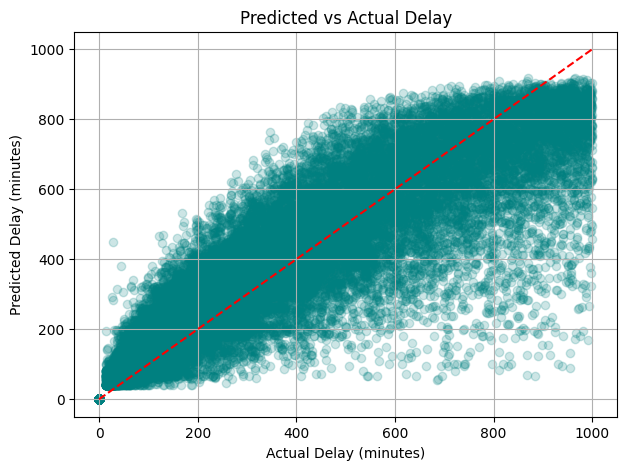

In [40]:
# Regression Model Using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_reg_train)

# Predict
y_reg_pred = rf_reg.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
r2 = r2_score(y_reg_test, y_reg_pred)

# Print results
print_color("Regression Model Performance:",color='Blue')
print(f"MAE (Mean Absolute Error): {mae:.2f} minutes")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f} minutes")
print(f"R² Score: {r2:.4f}")

# Optional: Plot predicted vs actual
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.2, color='teal')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.xlabel("Actual Delay (minutes)")
plt.ylabel("Predicted Delay (minutes)")
plt.title("Predicted vs Actual Delay")
plt.grid(True)
plt.show()

Improved Regression Results
MAE:  87.25 minutes
RMSE: 131.14 minutes
R²:   0.7967


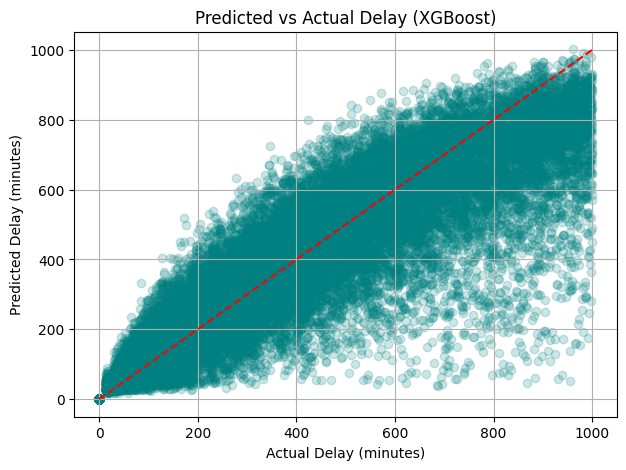

In [42]:
# Improved Regression Model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 🔄 Log-transform the target to reduce skewness
y_reg_train_log = np.log1p(y_reg_train)
y_reg_test_log = np.log1p(y_reg_test)

# 🚀 Train XGBoost Regressor
xgb_reg = XGBRegressor( n_estimators=150,learning_rate=0.05,max_depth=6,subsample=0.8,colsample_bytree=0.8,random_state=42,n_jobs=-1)

xgb_reg.fit(X_train, y_reg_train_log)

# 🔁 Predict (inverse transform to get original scale)
y_reg_pred_log = xgb_reg.predict(X_test)
y_reg_pred = np.expm1(y_reg_pred_log)

# 📊 Evaluation
mae = mean_absolute_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
r2 = r2_score(y_reg_test, y_reg_pred)

print("Improved Regression Results")
print(f"MAE:  {mae:.2f} minutes")
print(f"RMSE: {rmse:.2f} minutes")
print(f"R²:   {r2:.4f}")

# 📈 Plot predicted vs actual
plt.figure(figsize=(7, 5))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.2, color='teal')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.xlabel("Actual Delay (minutes)")
plt.ylabel("Predicted Delay (minutes)")
plt.title("Predicted vs Actual Delay (XGBoost)")
plt.grid(True)
plt.show()

In [44]:
# OAI
# Define weights for different delay causes
weights = {'carrier_delay': 2.0,'late_aircraft_delay': 1.5,  'weather_delay': 0.5,'nas_delay': 0.75,'security_delay': 0.3}

# Calculate weighted delay score (OAI)
df['OAI_score'] = sum(df[col] * weights[col] for col in weights)

# Optional: log transform to reduce skew
df['OAI_score_log'] = np.log1p(df['OAI_score'])

# Use same features as before
X_oai = X.copy()
y_oai = df['OAI_score_log']

# Split
from sklearn.model_selection import train_test_split

X_oai_train, X_oai_test, y_oai_train, y_oai_test = train_test_split(
    X_oai, y_oai, test_size=0.3, random_state=42)

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train model
xgb_oai = XGBRegressor(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_oai.fit(X_oai_train, y_oai_train)

# Predict and inverse log transform
y_oai_pred_log = xgb_oai.predict(X_oai_test)
y_oai_pred = np.expm1(y_oai_pred_log)
y_oai_actual = np.expm1(y_oai_test)

# Evaluate
mae = mean_absolute_error(y_oai_actual, y_oai_pred)
rmse = np.sqrt(mean_squared_error(y_oai_actual, y_oai_pred))
r2 = r2_score(y_oai_actual, y_oai_pred)

print_color("OAI-based Model Evaluation:",color='purple')
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  134.59
RMSE: 206.67
R²:   0.7873


In [48]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\sahit\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


100%|===================| 28303/28305 [07:10<00:00]        

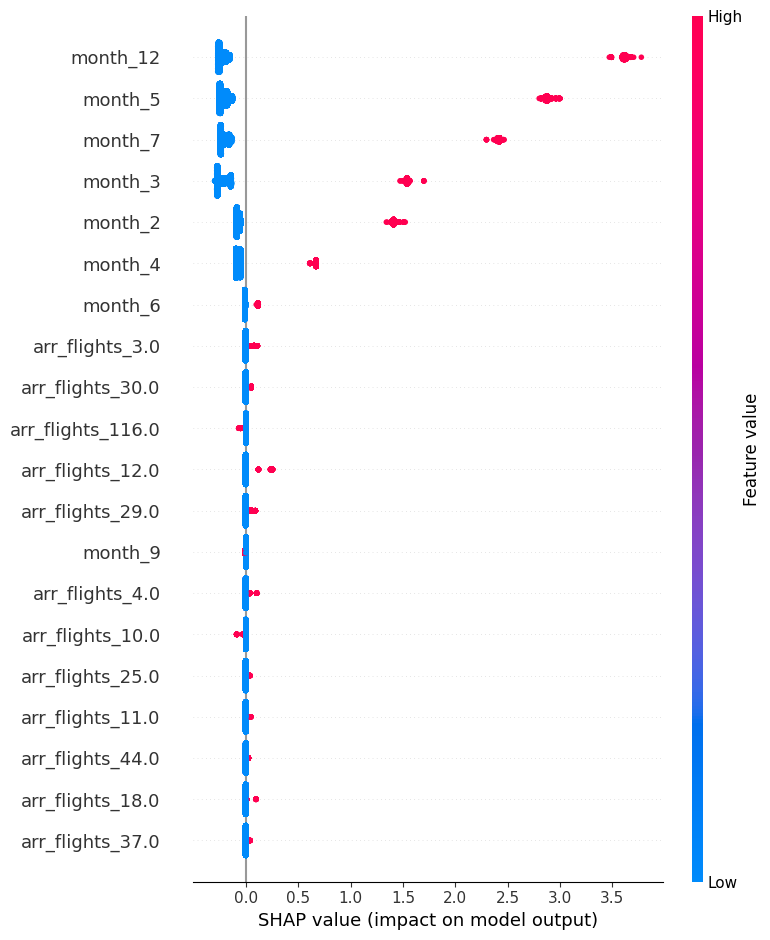

In [52]:
def final_shap_clean(X_train, X_test):
    import pandas as pd

    # Combine train and test for consistent encoding
    X_combined = pd.concat([X_train, X_test], axis=0)

    # Convert all object columns to string
    X_combined = X_combined.astype(str)

    # One-hot encode everything
    X_encoded = pd.get_dummies(X_combined, drop_first=True)

    # Force convert to numeric (any leftover bad values → NaN → 0)
    X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Ensure there are no object dtypes left
    assert X_encoded.select_dtypes(include='object').empty, "Still object columns!"

    # Split back
    X_train_clean = X_encoded.iloc[:len(X_train), :]
    X_test_clean = X_encoded.iloc[len(X_train):, :]

    return X_train_clean, X_test_clean

X_oai_train_clean, X_oai_test_clean = final_shap_clean(X_oai_train, X_oai_test)

import shap

explainer = shap.Explainer(xgb_oai, X_oai_train_clean)
shap_values = explainer(X_oai_test_clean)

shap.summary_plot(shap_values, X_oai_test_clean)
